In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
rides = pd.read_csv("D:\\Uber Data Analysis Project\\trips_data.csv")

## Dataset Information

In [3]:
rides.head(10)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL
5,458,VIP,COMPLETED,2020-12-10 11:42:15 +0000 UTC,2020-12-10 11:46:20 +0000 UTC,-23.559372,-46.666473,2020-12-10 12:06:15 +0000 UTC,-23.624500,-46.701077,6.17,21.25,BRL
6,458,Black,COMPLETED,2020-12-10 01:34:25 +0000 UTC,2020-12-10 01:42:28 +0000 UTC,-23.624605,-46.700980,2020-12-10 02:01:57 +0000 UTC,-23.559233,-46.666546,5.60,36.00,BRL
7,458,UberX,COMPLETED,2020-12-07 23:48:41 +0000 UTC,2020-12-07 23:57:30 +0000 UTC,-23.627161,-46.664190,2020-12-08 00:18:11 +0000 UTC,-23.559366,-46.666637,6.71,33.22,BRL
8,458,VIP,CANCELED,2020-12-04 22:11:42 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-23.545380,-46.648098,1970-01-01 00:00:00 +0000 UTC,-23.552162,-46.636454,0.00,0.00,BRL
9,458,UberX,COMPLETED,2020-12-04 21:48:04 +0000 UTC,2020-12-04 21:56:13 +0000 UTC,-23.559399,-46.666470,2020-12-04 22:05:42 +0000 UTC,-23.547750,-46.644104,1.83,11.52,BRL


In [4]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 43.3+ KB


                  count  mean   std  min  25%   50%   75%   max
Distance (miles)  544.0   4.1   3.8  0.0  1.2   3.4   6.0  19.7
Fare Amount       544.0  15.8  11.6  0.0  7.8  14.4  24.3  58.8


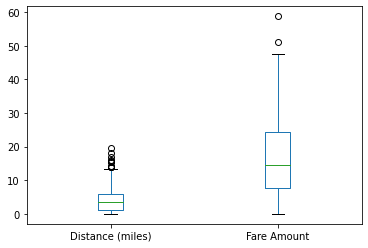

In [5]:
#creating an additional dataframe without Uber EATS records (out of analysis scope)
df1 = rides[rides['Product Type']!='UberEATS Marketplace'][['Distance (miles)','Fare Amount']]

print(df1.describe().transpose().round(1));
df1.boxplot(grid=False);

Taking a look on the continuous variables, we notice the presence of some outliers. However these outliers do not seem to reflect any abnormal value 

                  count  mean   std  min  25%   50%   75%   max
Distance (miles)  544.0   4.1   3.8  0.0  1.2   3.4   6.0  19.7
Fare Amount       544.0  15.8  11.6  0.0  7.8  14.4  24.3  58.8


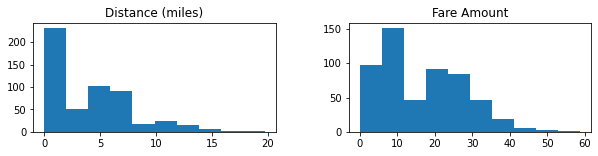

In [6]:
print(df1.describe().transpose().round(1));
df1.hist(grid=False, figsize=(10,2));

The charts below show a different perspective of the variables distribution. In this case, we see that both variables present an assimetric distribution (positive). For distance we notice that the higher frequency values are shorter distances, and for fare amount we have the same behaviour.

Additionally, we also notice that the standard deviation are high, taking 'means' as our reference. This means that values in both variables are very dispersal.

<AxesSubplot:xlabel='Distance (miles)', ylabel='Fare Amount'>

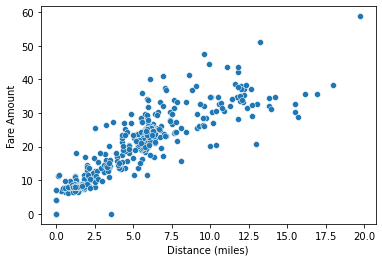

In [7]:
sns.scatterplot(x='Distance (miles)',y='Fare Amount',data=df1)

We have a strong correlation between 'fare_amount' and 'distance_miles', inferring that as much you stay on the ride, higher will the fare be.

## Data Preparation

Let's remove the column fare_currency, since all my trips happened inside a single country (Brazil).

In [8]:
rides.pop('Fare Currency')

0      BRL
1      BRL
2      BRL
3      BRL
4      BRL
      ... 
549    BRL
550    BRL
551    BRL
552    BRL
553    BRL
Name: Fare Currency, Length: 554, dtype: object

In [9]:
rides.isnull().sum().sort_values(ascending=False)

Begin Trip Lat          29
Begin Trip Lng          29
Dropoff Lat             29
Dropoff Lng             29
Product Type             3
City                     0
Trip or Order Status     0
Request Time             0
Begin Trip Time          0
Dropoff Time             0
Distance (miles)         0
Fare Amount              0
dtype: int64

Cheecking the missing value and despite empty Lng and Lat values (29 total), there were found 3 records without product_type. As shown below, these records are insignificant to my dataset, since practically no columns are fulfilled.

In [10]:
rides[rides['Product Type'].isnull()]

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount
281,458,NaN,UNFULFILLED,2018-05-26 18:36:51 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
362,1449,NaN,UNFULFILLED,2018-02-13 01:59:25 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
392,1449,NaN,UNFULFILLED,2018-01-01 04:44:10 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0


So now, let's get rid of these 3 records before proceding

In [11]:
rides.dropna(subset = ['Product Type'], inplace=True)

## Data Cleaning

##### Checking categories in product_type column

In [12]:
rides['Product Type'].value_counts()

UberX                   169
uberX                   144
uberX VIP                81
VIP                      71
POOL                     36
Pool                     12
UberEATS Marketplace     10
POOL: MATCHED             8
uberPOOL: MATCHED         5
uberPOOL                  5
Pool: MATCHED             4
Black                     3
Juntos                    1
UberBLACK                 1
uberx                     1
Name: Product Type, dtype: int64

While analyzing the first column of the division, it can be clearly seen that different values referr to the same category. Therefore we reclassify them

In [13]:
rides = rides[rides['Product Type']!='UberEATS Marketplace']

##### Categories reclassification

In [14]:
product_mapping = {'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','POOL: MATCHED':'Pool','UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool'}

In [15]:
rides['Product Type'].replace(product_mapping, inplace = True)

In [16]:
rides['Product Type'].value_counts()

UberX     466
Pool       70
Black       4
Juntos      1
Name: Product Type, dtype: int64

Since most of these reviews are only around Uber rides, lets remove the UberEATS records from the database.

The days tend to play a vital role in the analysis as we can divide them into different parts and extract insights that come in different ways. 
As we can see that the feature days are of object data type, therefore we convert them into date time format.

## Data Transformation

##### Library for manipulating dates and times

In [17]:
from datetime import datetime
from datetime import timedelta

##### Function to convert features to datetime

In [18]:
def date_convertion(df, cols):
  for col in cols:
    df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
    df[col] = pd.to_datetime(df[col])
  return df

In [19]:
rides = date_convertion(rides, ['Request Time', 'Begin Trip Time', 'Dropoff Time'])

Now, let’s split the feature into different parts of the date. 

In [20]:
rides['year'] = rides['Request Time'].map(lambda x: datetime.strftime(x,"%Y"))
rides['month'] = rides['Request Time'].map(lambda x: datetime.strftime(x,"%b"))
rides['weekday'] = rides['Request Time'].map(lambda x: datetime.strftime(x,"%a"))
rides['time'] = rides['Request Time'].map(lambda x: datetime.strftime(x,"%H:%M"))

## Feature Engineering

Lets create a new feature to understand how much it cost per kilometer.

In [21]:
rides['distance_km'] = round(rides['Distance (miles)']*1.60934,2)
rides['amount_km'] = round(rides['Fare Amount']/rides.distance_km,2)

Delta time between and will now allow for how much time (in minutes) is required for Uber cars to reach the destination. In this case, it is calculated on the basis of minutes.

In [22]:
rides['request_lead_time'] = rides['Begin Trip Time'] - rides['Request Time']
rides['request_lead_time'] = rides['request_lead_time'].apply(lambda x: round(x.total_seconds()/60,1))

Similarly, the delta time between and will now allow for how much time (in minutes) is spent on each trip.

In [23]:
rides['trip_duration'] = rides['Dropoff Time'] - rides['Begin Trip Time']
rides['trip_duration'] = rides['trip_duration'].apply(lambda x: round(x.total_seconds()/60,1))

Since features on Driver_Cancelled and Driver_Cancelled records will not be useful in the analysis, lets set them as useless values to clear the dataset a bit.

In [24]:
rides.loc[(rides['Trip or Order Status'] == 'CANCELED') | (rides['Trip or Order Status'] == 'DRIVER_CANCELED'),'request_lead_time']=np.nan
rides.loc[(rides['Trip or Order Status'] == 'CANCELED') | (rides['Trip or Order Status'] == 'DRIVER_CANCELED'),'amount_km']=np.nan
rides.loc[(rides['Trip or Order Status'] == 'CANCELED') | (rides['Trip or Order Status'] == 'DRIVER_CANCELED'),['Begin Trip Time','Dropoff Time']]= np.nan

## Data Analysis

In order to better organize the analysis, deleting all trips with CANCELED and DRIVER_CANCELED, as they should not be considered in some queries.

In [25]:
completed_rides = rides[(rides['Trip or Order Status']!='CANCELED')&(rides['Trip or Order Status']!='DRIVER_CANCELED')]

##### Number of trips per year from April'16 to Jan'21

Total trips:  444
2016     17
2017    120
2018    146
2019    106
2020     52
2021      3
Name: year, dtype: int64


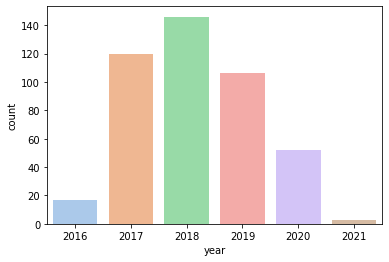

In [26]:
print('Total trips: ', completed_rides['Trip or Order Status'].count())
print(completed_rides.year.value_counts().sort_index(ascending=True))
sns.countplot(data=completed_rides, x='year',order=['2016','2017','2018','2019','2020','2021'], palette='pastel');

If we do not think about 2016 and 2021 (not full years), we can clearly see that from 2017 to 2019 mid-year passengers are 124, and that there is a significant decrease from 2019 to 2020 (-51%). This is easily explained by the outbreak of COVID.

##### Nummber of trips cancelled or completed

In [27]:
print('Total trips: ', rides['Trip or Order Status'].count())
print(round(rides['Trip or Order Status'].value_counts()/rides['Trip or Order Status'].size*100,1))

Total trips:  541
COMPLETED          82.1
CANCELED           16.1
DRIVER_CANCELED     1.8
Name: Trip or Order Status, dtype: float64


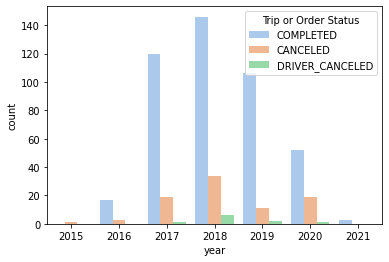

In [28]:
sns.countplot(data=rides, x='year', order=['2015','2016','2017','2018','2019','2020','2021'], hue='Trip or Order Status', palette = 'pastel');

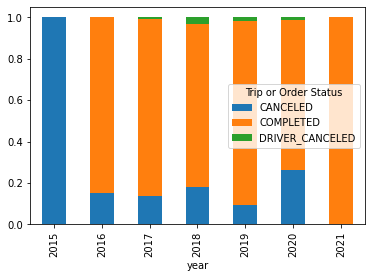

In [29]:
rides.groupby(by=['year'])['Trip or Order Status'].value_counts(normalize=True).unstack('Trip or Order Status').plot.bar(stacked=True);

If we look at the barriers set out below, we see that with the exception of 2015 and 2021 (due to low travel volume), 2020 has the highest cancellation record. This could be an alarming indicator, given the negative impact on businesses after the Covid outbreak. Overall, the cancellation rate was 17.9% (given the cancellation of RIDERS and DRIVERS)

##### Places for the most layoffs

The next heatmap with power shows the most visited areas in all hues and sizes. This could be important information for Uber to adjust prices and increase demand in certain regions and include time-consuming data to track user behavior.

In [30]:
import folium

In [31]:
data = completed_rides.dropna(subset=['Dropoff Lat', 'Dropoff Lng'])

In [32]:
from folium import plugins
coord=[]
for lat,lng in zip(data['Dropoff Lat'].values, data['Dropoff Lng'].values):
  coord.append([lat,lng])
map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%', 
    height='50%',
    control_scale=True)
map.add_child(plugins.HeatMap(coord))
map

The above heatmap shows the red is the most in-demand region for Uber cabs followed by the green region. Uber should increase the number of cabs in these regions to increase customer satisfaction and revenue.

##### Type of product most often used

       Total Rides     %
UberX          401  90.3
Pool            39   8.8
Black            4   0.9


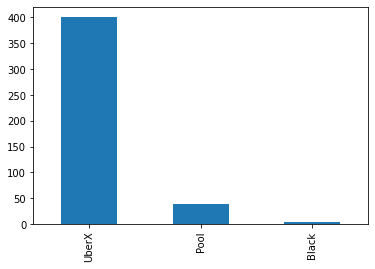

In [33]:
# Creating a series with product types count
pt_rides = pd.Series(completed_rides['Product Type'].value_counts().sort_index(ascending=False))
# Transforming serie in dataframe
df = pd.DataFrame(pt_rides)
# Including new column with trips portion
df['%'] = (completed_rides['Product Type'].value_counts().sort_index(ascending=False)/completed_rides['Product Type'].size*100).round(1)
#Renaming columns labels
df.rename(columns={'Product Type':'Total Rides'}, inplace=True)
print(df)
# Plotting product types count
completed_rides['Product Type'].value_counts().plot(kind='bar');

UberX is the preferred product type with a frequency of 90.3%. So I would say that I am the type of user who usually looks for affordable prices.

Since not many people travel through Pool or Black they should increase the UberX rides to gain profit. As it is more affordable than others.

##### The fare, distance, amount, and time spent on the ride

In [34]:
print('Avg. fare:', round(completed_rides['Fare Amount'].mean(),1),'BRL')
print('Avg. distance:',round(completed_rides.distance_km.mean(),1),'km')
print('Avg. fare/km:',round(completed_rides['Fare Amount'].sum()/completed_rides.distance_km.sum(),1),'BRL/km')
print('Avg. time spent on trips:',round(completed_rides.trip_duration.mean(),1),'minutes')
print('')
print('Total fare amount:', round(completed_rides['Fare Amount'].sum(),1),'BRL')
print('Total distance:',round(completed_rides.distance_km.sum(),1),'km')
print('Total time spent on trips:',round(completed_rides.trip_duration.sum()/60,1),'hours')

Avg. fare: 19.2 BRL
Avg. distance: 8.1 km
Avg. fare/km: 2.4 BRL/km
Avg. time spent on trips: 21.4 minutes

Total fare amount: 8532.8 BRL
Total distance: 3575.0 km
Total time spent on trips: 158.4 hours


Considering the whole trip, the average amount spent on the trip is 19.2 BRL, subtracting approx. 8.1 km. Therefore, if we quickly estimate how much one will spend per year making daily trips we will have: 365 days * two trips * 19.2 BRL / fare = 14,016 BRL / year

And on average, Used almost. 2.4 BRL / km and 21.3 minutes per trip.

Uber can lead offers on rides during festival seasons to attract customers which might take long-distance rides.

##### The days of the week that have the highest number of rides per kilometer

In [35]:
#overlapping pivot tables to get weighted average
amount_table = completed_rides.pivot_table(values='Fare Amount',aggfunc='sum',columns='weekday', index='year').round(1)
column_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
amount_table = amount_table.reindex(column_order, axis=1)
distance_table = completed_rides.pivot_table(values='distance_km',aggfunc='sum',columns='weekday', index='year').round(1)
distance_table = distance_table.reindex(column_order, axis=1)
(amount_table/distance_table).round(1)

weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
year,,,,,,,
2016,NaN,NaN,2.8,2.4,NaN,2.1,2.9
2017,2.8,2.1,2.4,2.2,2.7,2.1,2.7
2018,2.0,1.9,2.6,2.0,2.2,2.4,2.2
2019,2.5,2.4,2.1,2.3,3.1,2.3,2.7
2020,2.7,2.4,2.7,2.6,2.4,3.1,2.8
2021,NaN,NaN,3.1,NaN,NaN,NaN,3.6


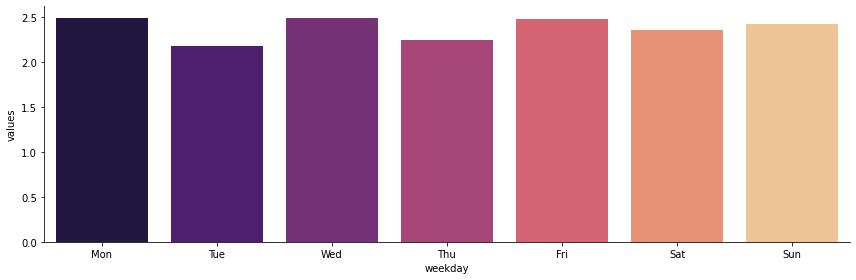

In [36]:
#creating an auxiliar data frame to be displayed in category plot
aux_serie = round((completed_rides.groupby('weekday')['Fare Amount'].sum()/completed_rides.groupby('weekday')['distance_km'].sum()),2)
amount_km_df = pd.DataFrame(aux_serie)
amount_km_df = amount_km_df.reset_index()
amount_km_df.rename(columns={'weekday':'weekday',0:'values'},inplace=True)
sns.catplot(x='weekday', y='values', data=amount_km_df, kind='bar', height=4, aspect=3, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],palette='magma');

According to the chart below, we see that Monday, Wednesday, Friday, and Sunday were the most expensive days of the week. Therefore, it allows us to better understand the weekly season, and find the most profitable days for Uber and its drivers.

Most of the Uber ride travelers are IT Job workers and Office workers. They prefer traveling through Uber to their offices during weekdays. So, there are not many people willing to travel on weekends due to off days from work.

##### The longest / shortest and most expensive / cheapest ride

In [37]:
rides_distance = completed_rides[completed_rides.distance_km==completed_rides.distance_km.max()]
rides_distance = rides_distance.append(completed_rides[completed_rides.distance_km==completed_rides.distance_km.min()])
rides_distance

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,2020,Dec,Fri,23:16,31.77,1.85,11.0,65.2
305,458,UberX,COMPLETED,2018-04-15 23:18:40,2018-04-15 23:27:42,-23.502636,-46.624952,2018-04-15 23:34:17,-23.503310,-46.636808,0.15,11.27,2018,Apr,Sun,23:18,0.24,46.96,9.0,6.6


The table below shows the longest record (31.77 km) and the shortest ride (0.24 km).

In [38]:
rides_amount_km = completed_rides[completed_rides.amount_km==completed_rides.amount_km.max()]
rides_amount_km = rides_amount_km.append(completed_rides[completed_rides.amount_km==completed_rides.amount_km.min(0)])
rides_amount_km

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
305,458,UberX,COMPLETED,2018-04-15 23:18:40,2018-04-15 23:27:42,-23.502636,-46.624952,2018-04-15 23:34:17,-23.503310,-46.636808,0.15,11.27,2018,Apr,Sun,23:18,0.24,46.96,9.0,6.6
87,458,UberX,COMPLETED,2019-11-30 03:34:56,2019-11-30 03:40:37,-23.591813,-46.690720,2019-11-30 03:53:24,-23.559366,-46.666489,3.54,0.00,2019,Nov,Sat,03:34,5.70,0.00,5.7,12.8


The full paid mileage price we have: 
expensive (46.96 BRL / km) and cheap (0 BRL / km). Cheap travel certainly means a free ride, while the cost is 46.96 BRL. This result is driven by a constant low cost at the most demanding times, as the total distance was only 0.24km.

Short-distance Uber rides are quite cheap, compared to long-distance. Uber can fix some amount per kilometer can set minimum limit for traveling in Uber.

##### The average lead time before requesting a trip

In [39]:
print(round(completed_rides.request_lead_time.mean(),1),'minutes')

4.9 minutes


## Conclusion

After analyzing the various parameters, here are a few guidelines that we can conclude. If you were a Business analyst or data scientist working for Uber or Lyft, you could come to the following conclusions:

Uber is very economical; however, Lyft also offers fair competition.
People prefer to have a shared ride in the middle of the night.
People avoid riding when it rains.
When traveling long distances, the price does not increase by line. However, based on time and demand, increases can affect costs.
Uber could be the first choice for long distances.

However, obtaining and analyzing the same data is the point of several companies. There are many businesses in the market that can help bring data from many sources and in various ways to your favorite data storage.